# Split testing

In [1]:




import re
from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd, logpsd
import matplotlib.pyplot as plt

from pathlib import Path

## Matplotlib setup
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

## Load data

[<Figure size 1500x1000 with 1 Axes>,
 [<Axes: xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{m}} \\right]$'>],
 []]

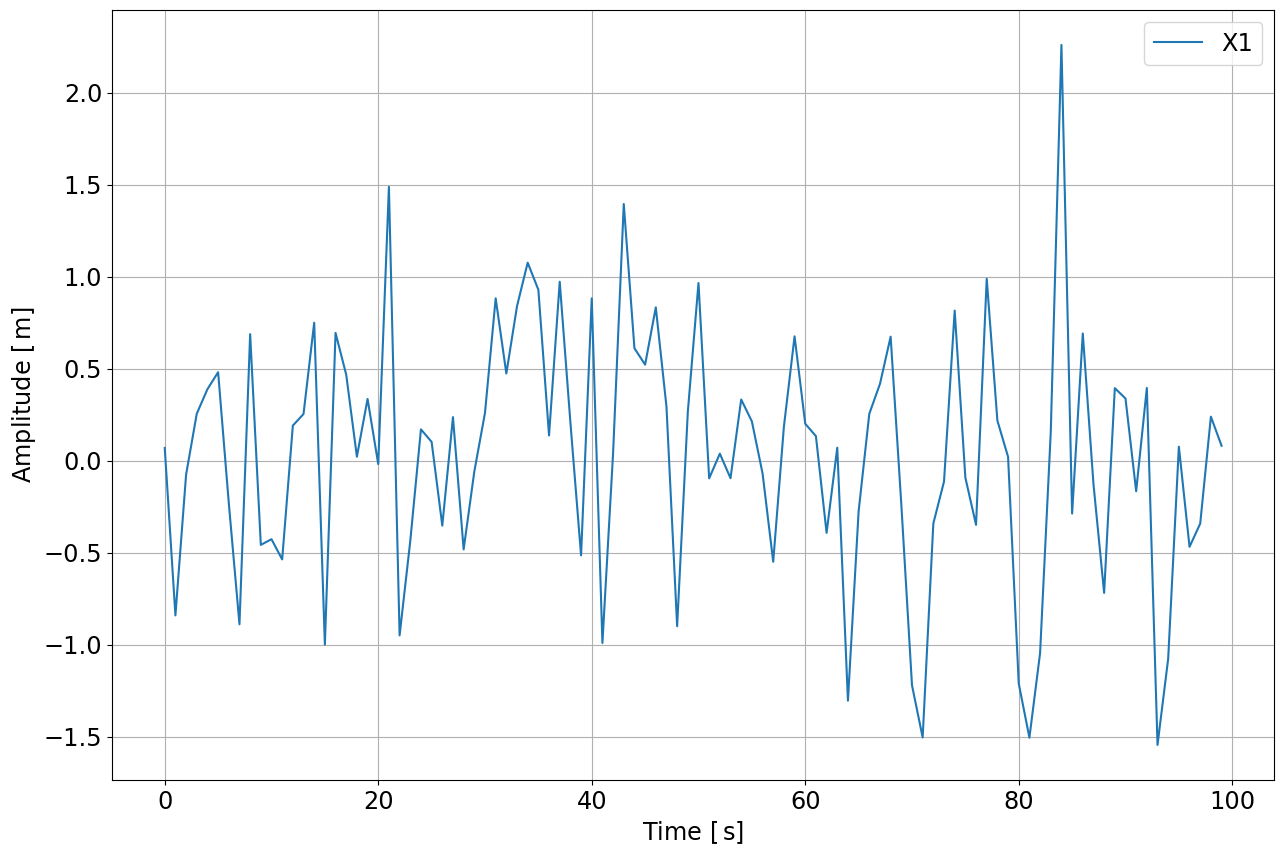

In [2]:
X1 = TSData.randn(nsecs=100, fs=1, name='X1', yunits='m')
X1.plot()

## Split by times

In [3]:

Xtimes = X1.split_by_time(times=[0, 10,
                                 10, 20,
                                 20, 30,
                                 0, -50])
print(X1.nsecs())

100.0


In [4]:
print(Xtimes[3].nsecs())

print(Xtimes[3].ydata()[-1])
print(X1.ydata()[-1])


50.0
0.2647092927515181
0.08060096800829457


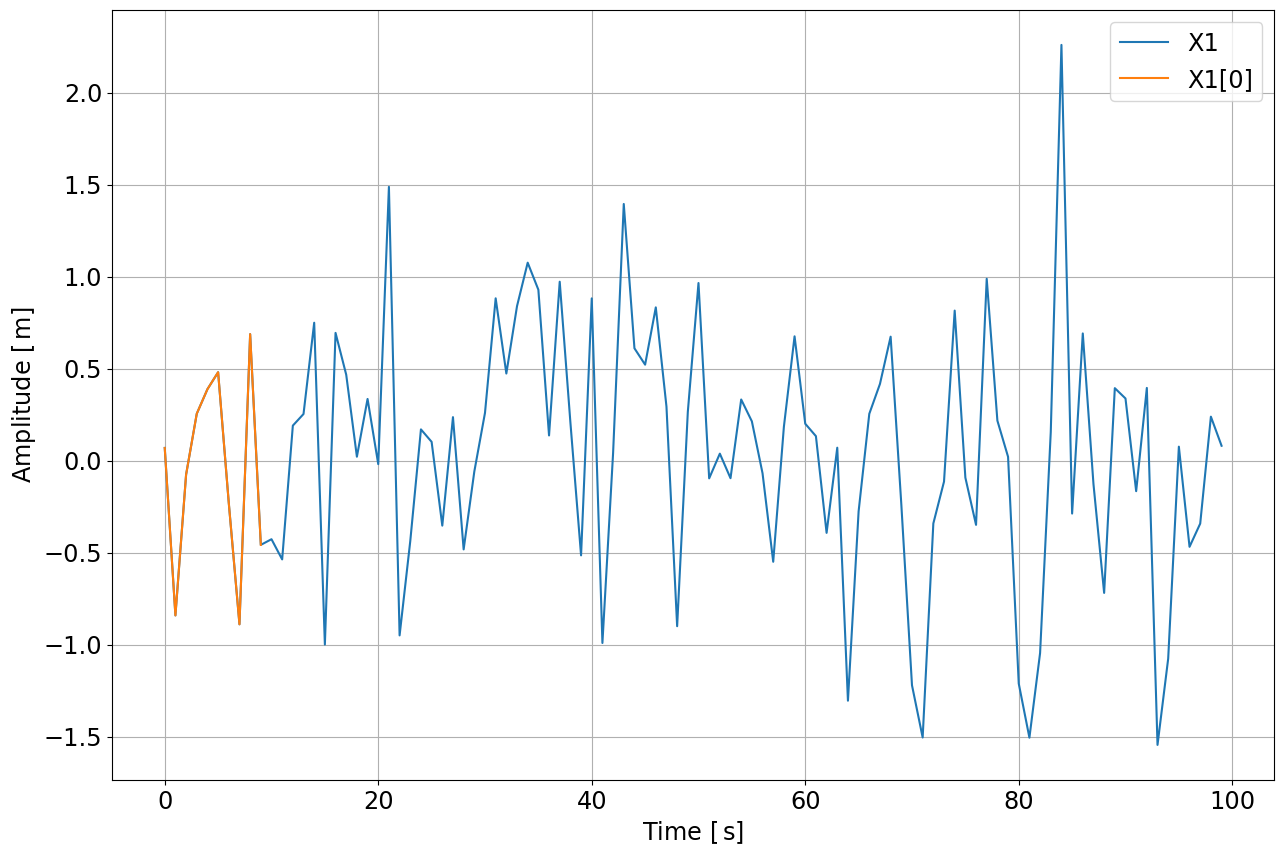

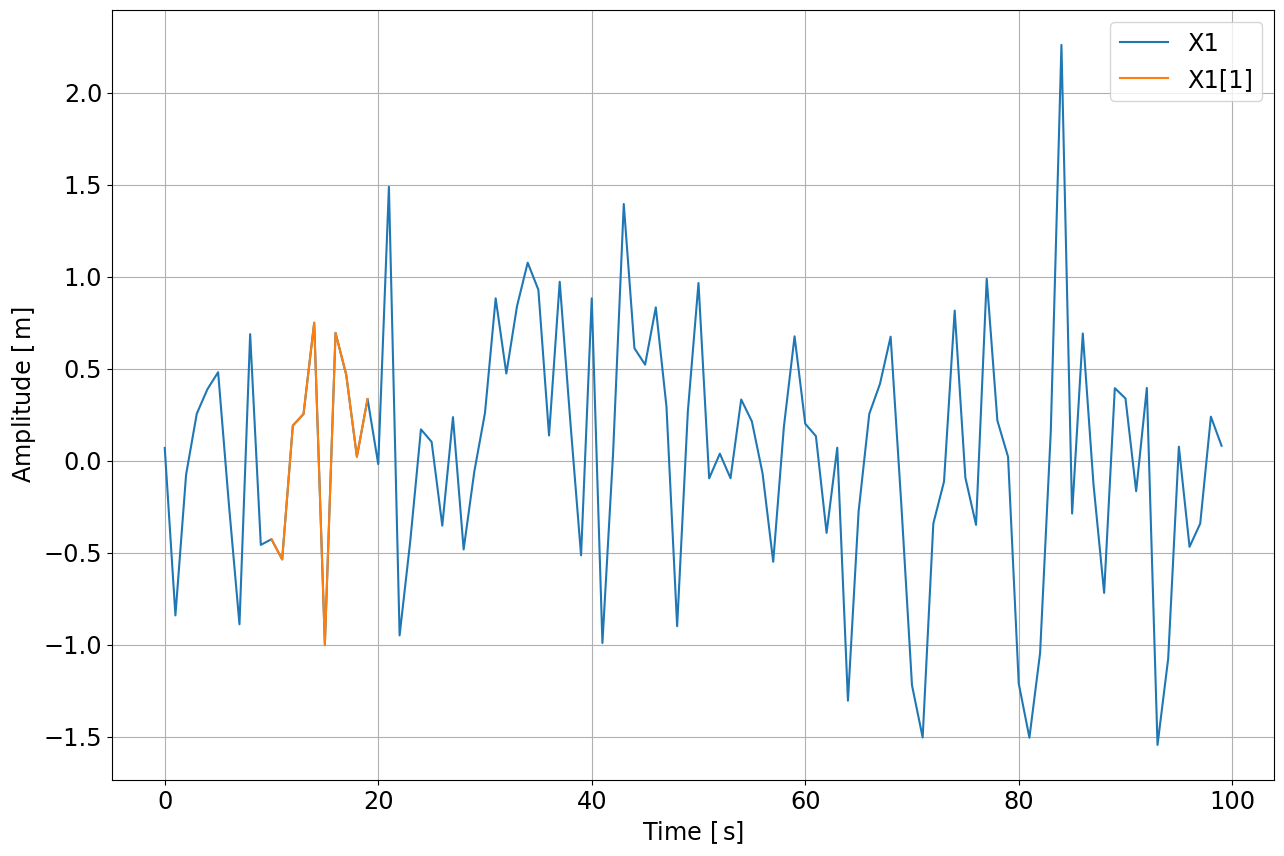

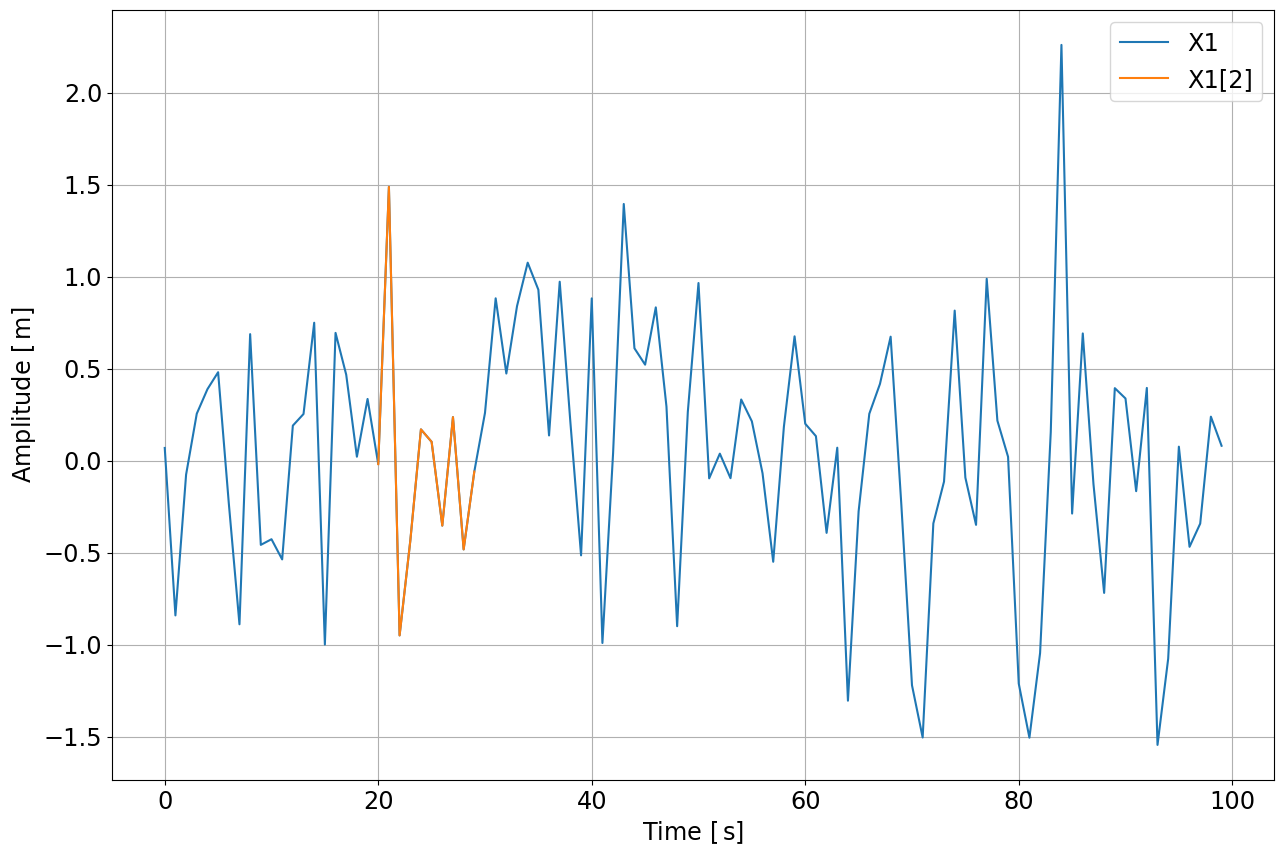

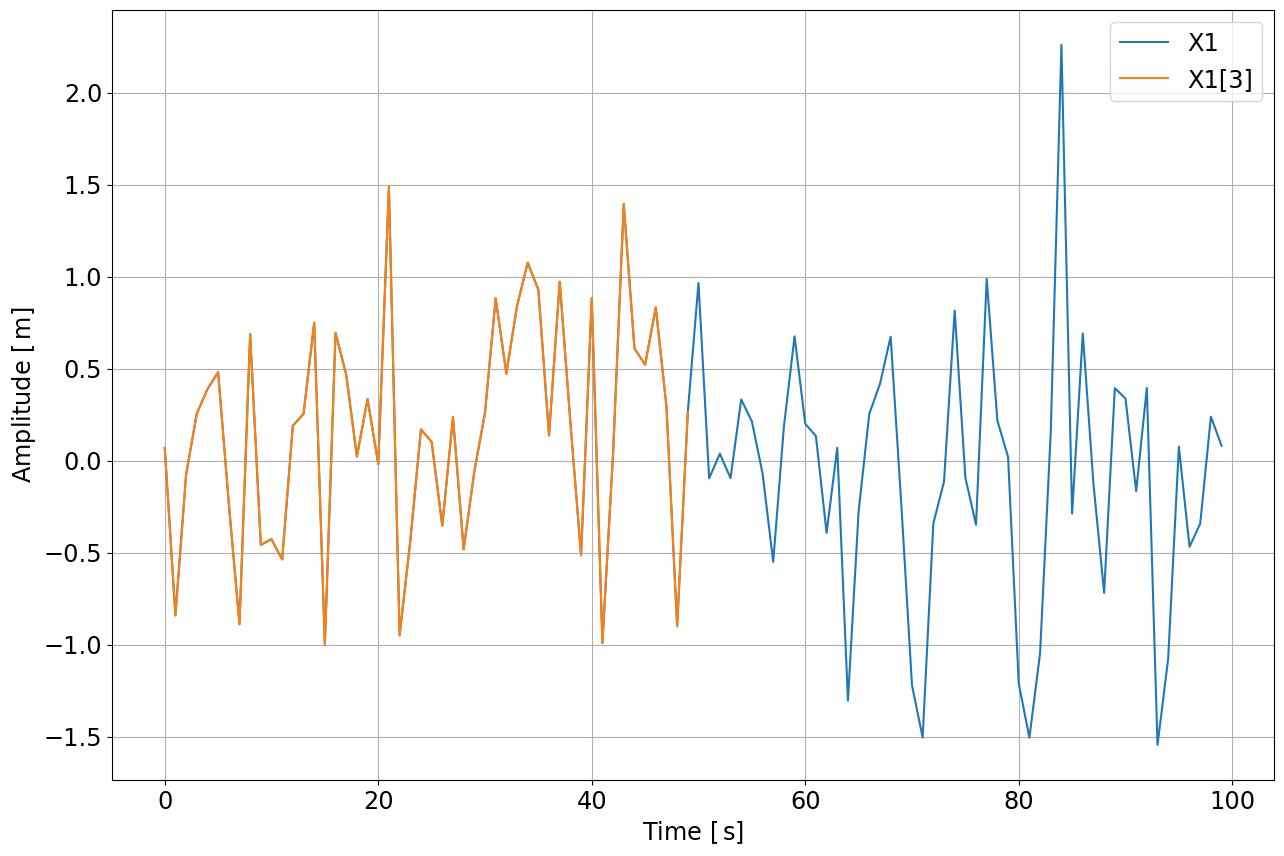

In [5]:
for X in Xtimes:
    X1.plot(X)



# Frequency Series

In [6]:
X1 = TSData.randn(nsecs=1000, fs=1, name='X1', yunits='m')
Sx = psd(X1, window='hanning', navs=2, percent_overlap=50, detrend_order=1)

Processing PSD with segments of length 667 and overlap of 333.0 samples (50%)


[<Figure size 1500x1000 with 1 Axes>,
 [<Axes: xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

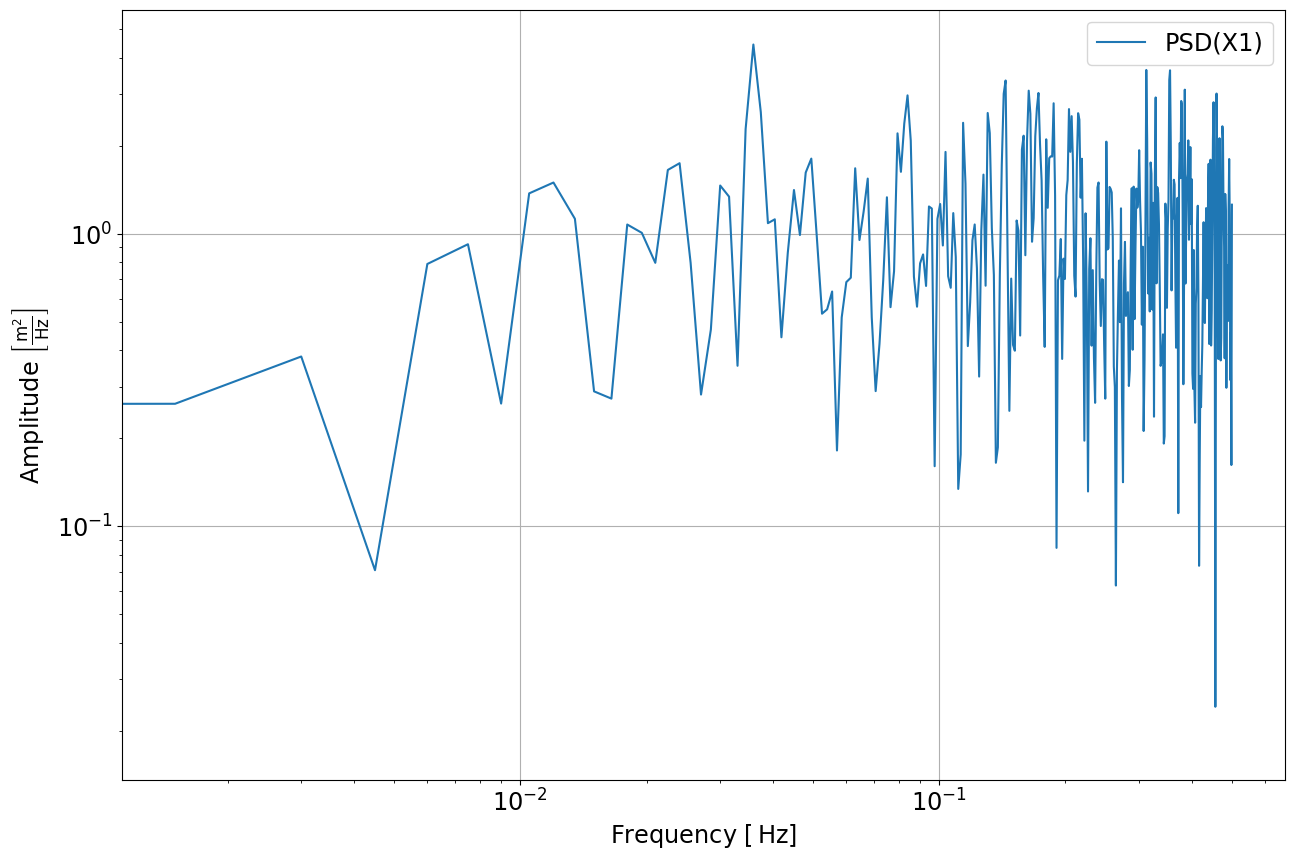

In [7]:
Sx.loglog()

In [8]:

Sx_parts = Sx.split_by_frequency(frequencies=[0, 0.01,
                                 0.02, 0.1,
                                 0.2, 0.5,
                                 0, -0.1]
                                 )


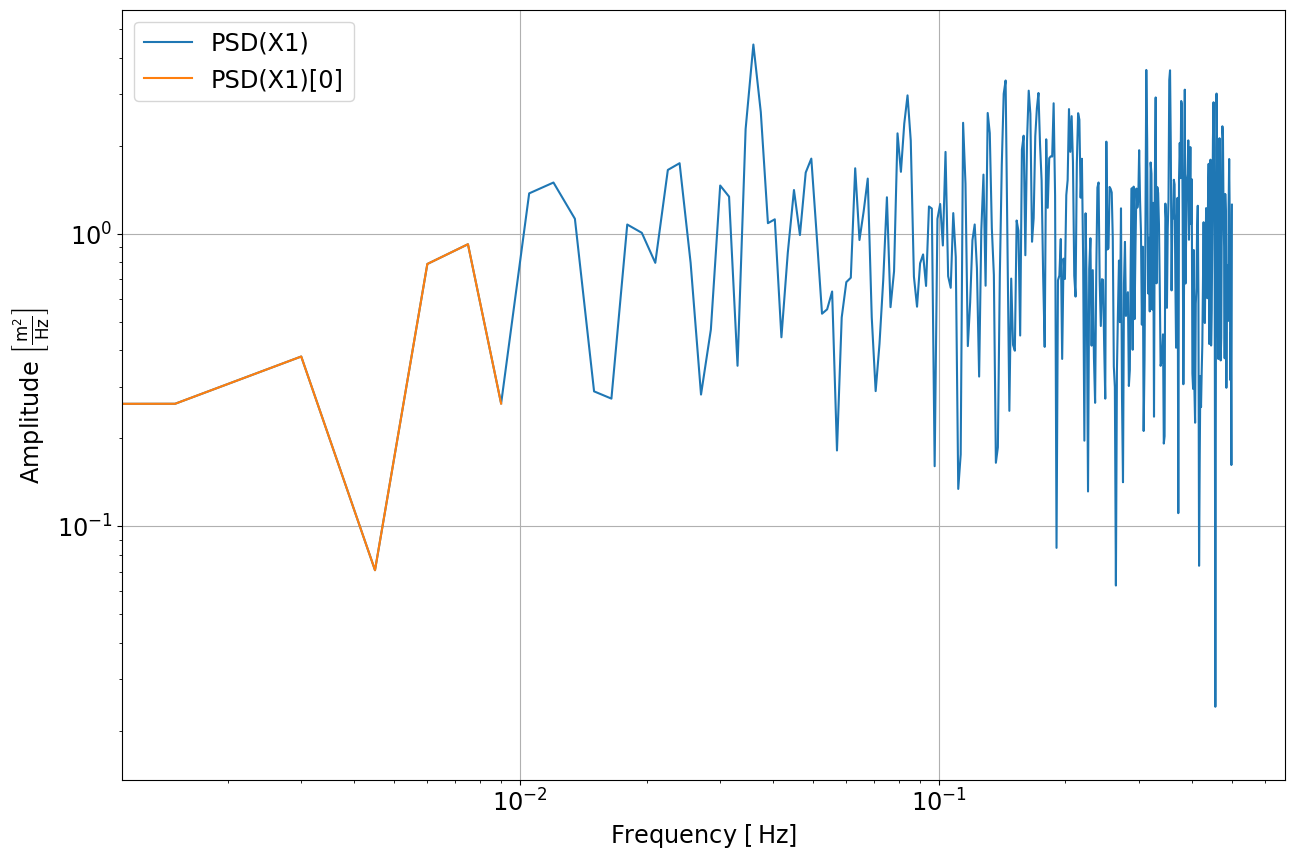

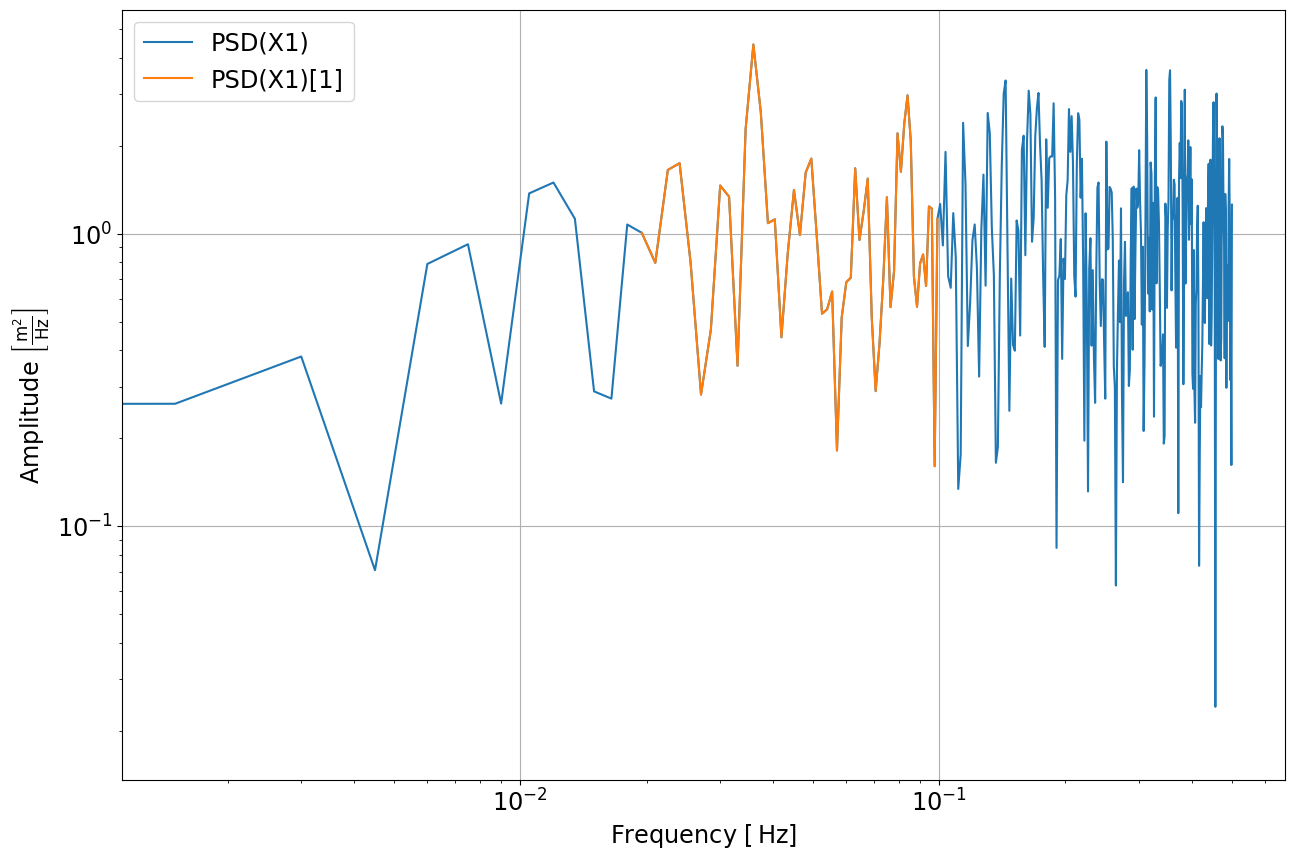

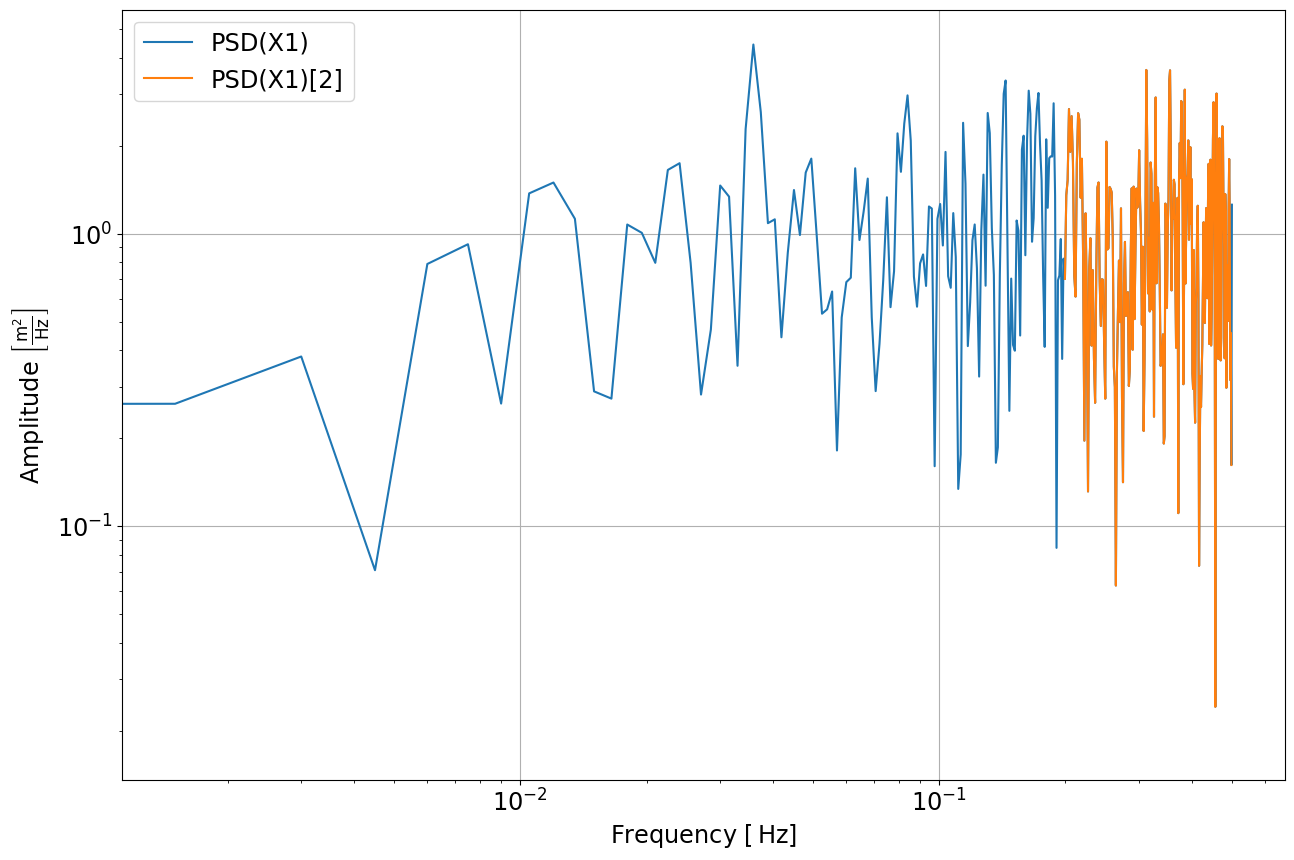

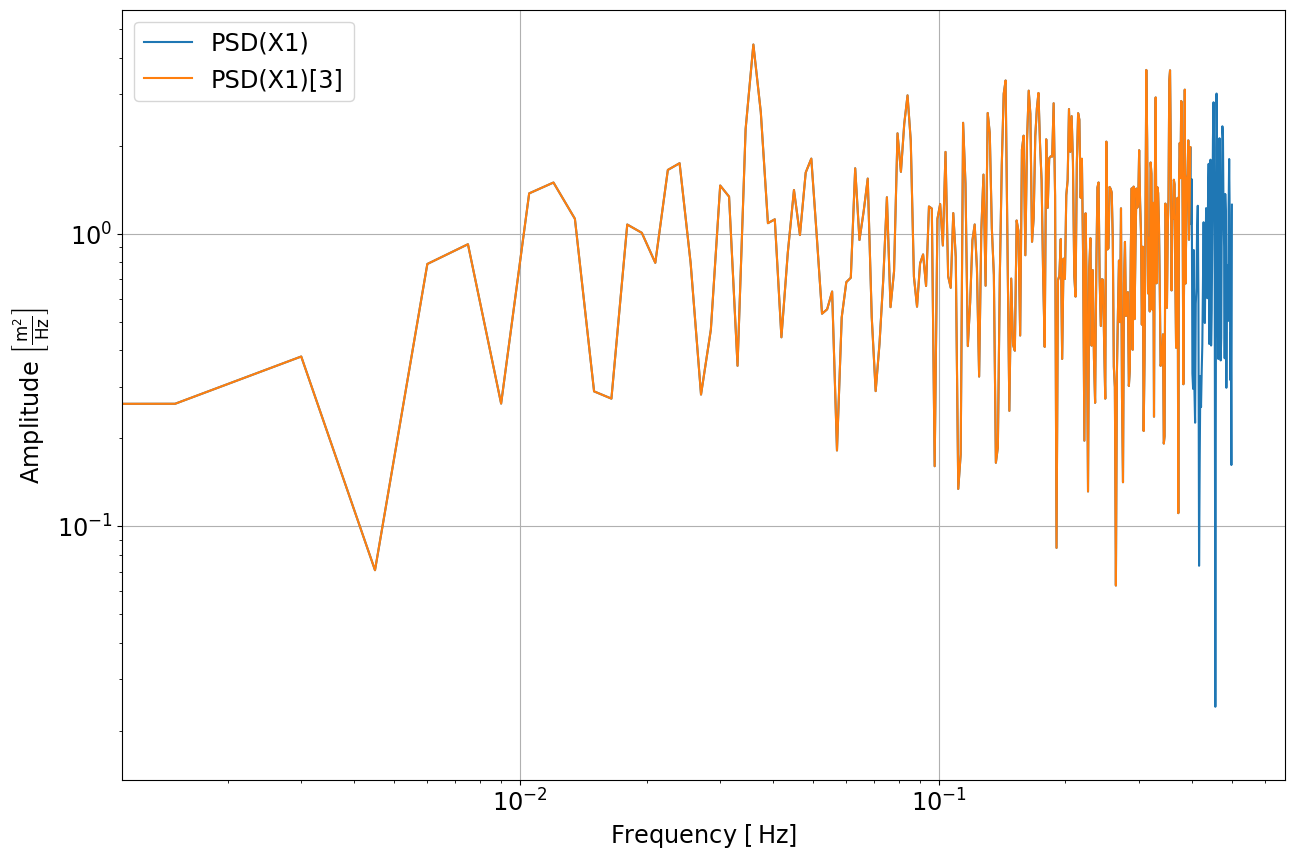

In [9]:
for X in Sx_parts:
    Sx.loglog(X)

